<a href="https://colab.research.google.com/github/SaraSilvaa/Aula-Mineiracao-de-Dados/blob/master/Atv_Guiada_SaraMartins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ANALISE DE DADOS: Avaliações de clientes do iPhone | PNL


In [6]:
import pandas as pd
from google.colab import files

df = pd.read_csv('/content/iphone.csv')
df.head()

,productAsin,country,date,isVerified,ratingScore,reviewTitle,reviewDescription,reviewUrl,reviewedIn,variant,variantAsin
0,B09G9BL5CP,India,11-08-2024,True,4,No charger,"Every thing is good about iPhones, there's not...",https://www.amazon.in/gp/customer-reviews/R345...,Reviewed in India on 11 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
1,B09G9BL5CP,India,16-08-2024,True,5,iPhone 13 256GB,"It look so fabulous, I am android user switche...",https://www.amazon.in/gp/customer-reviews/R2HJ...,Reviewed in India on 16 August 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
2,B09G9BL5CP,India,14-05-2024,True,4,Flip camera option nill,I tried to flip camera while recording but no ...,https://www.amazon.in/gp/customer-reviews/R3Y7...,Reviewed in India on 14 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
3,B09G9BL5CP,India,24-06-2024,True,5,Product,100% genuine,https://www.amazon.in/gp/customer-reviews/R1P9...,Reviewed in India on 24 June 2024,Colour: MidnightSize: 256 GB,B09G9BQS98
4,B09G9BL5CP,India,18-05-2024,True,5,Good product,Happy to get the iPhone 13 in Amazon offer,https://www.amazon.in/gp/customer-reviews/R1XI...,Reviewed in India on 18 May 2024,Colour: MidnightSize: 256 GB,B09G9BQS98



**productAsin:** Identificador exclusivo da Amazon para um produto.

**country:** O país onde a revisão foi enviada

**date:** A data em que a revisão foi enviada.

**isVerified:** Um booleano indicando se o revisor é um comprador verificado

**ratingScore:** A classificação numérica dada ao produto

**reviewTitle:** O título da revisão.

**reviewDescription:** O texto detalhado da revisão

**reviewUrl:** Semelhante a "link", mas referindo-se especificamente ao URL da revisão

**reviewedIn:** O produto ou categoria específica para a qual a avaliação foi deixada

**variant:** Se aplicável, a variante ou versão específica do produto que está sendo revisado

##Exploração dos dados

In [7]:
df.isnull().sum()

,0
productAsin,0
country,0
date,0
isVerified,0
ratingScore,0
reviewTitle,0
reviewDescription,86
reviewUrl,16
reviewedIn,0
variant,0


##Tratamento de dados faltantes

In [ ]:
df['reviewDescription'].fillna('Desconhecido', inplace=True)

###Conversao de tipo de dados

In [11]:
df['reviewDescription'] = df['reviewDescription'].astype('category')
df['ratingScore'] = pd.to_numeric(df['ratingScore'], errors='coerce')

###Exploração Estatistica dos dados

In [12]:
df.describe()

,ratingScore
count,3062.000000
mean,3.758981
std,1.579033
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


###Frequencia de valores para variaveis categoricas

In [13]:
df['reviewDescription'].value_counts()

,count
reviewDescription,
Desconhecido,86
Good,32
Nice,25
Good product,14
Excellent product,12
...,...
I picked a refurb in excellent condition but received a phone with many large scratches as well as LED burn in on 1/4 of the screen. I don’t mind the dents on the case portion but there are too many noticeable blemishes on screen to say this phone is even in good condition.,1
I phone ki battery purani h .band ho gi h .mobile ni chal raha h.,1
I phone 13 is not purchase phone is bad1day 3 times charging is not purchase friend I phone company is फ्राईड company,1


##Criação de Gráficos(visualização dos dados)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

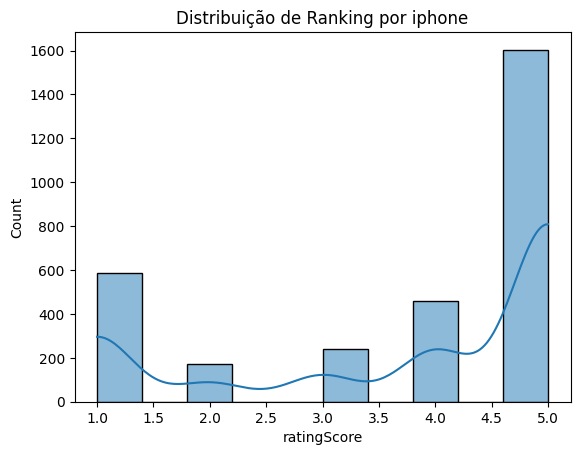

In [19]:
sns.histplot(df['ratingScore'], bins=10, kde=True)
plt.title('Distribuição de Ranking por Codigo de iphone')
plt.show()

###BoxPlot

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


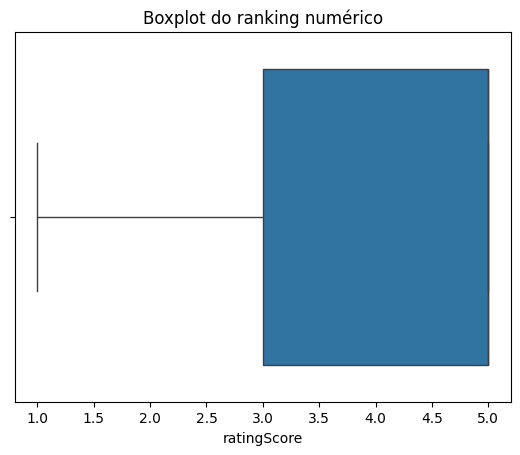

In [20]:
sns.boxplot(x=df['ratingScore'])
plt.title('Boxplot do ranking numérico')
plt.show()

#Grafico para variáveis categóricas

###Grafico de barras

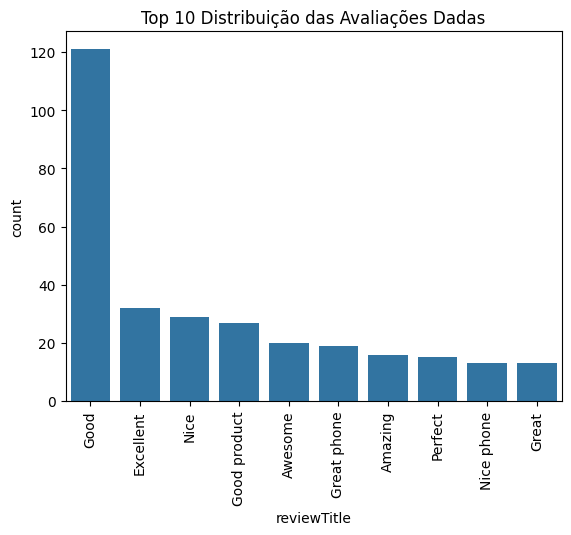

In [28]:
top10 = df['reviewTitle'].value_counts().nlargest(10)

# Criei um novo DataFrame apenas com os títulos mais comuns pois estava trazendo muitas informações
filtered_df = df[df['reviewTitle'].isin(top10.index)]

# Criei um gráfico de contagem para os títulos mais comuns e ficar mais visualizavel
sns.countplot(x='reviewTitle', data=filtered_df, order=top10.index)
plt.title('Top 10 Distribuição das Avaliações Dadas')
plt.xticks(rotation=90)
plt.show()

###Grafico de pizza

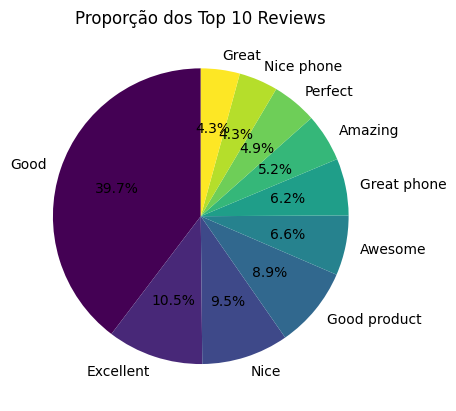

In [30]:
top_reviews = df['reviewTitle'].value_counts().nlargest(10)

# Crie um gráfico de pizza para os títulos mais comuns
top_reviews.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Proporção dos Top 10 Reviews')
plt.ylabel('')
plt.show()

##Graficos relacionais: Grafico de dispersão

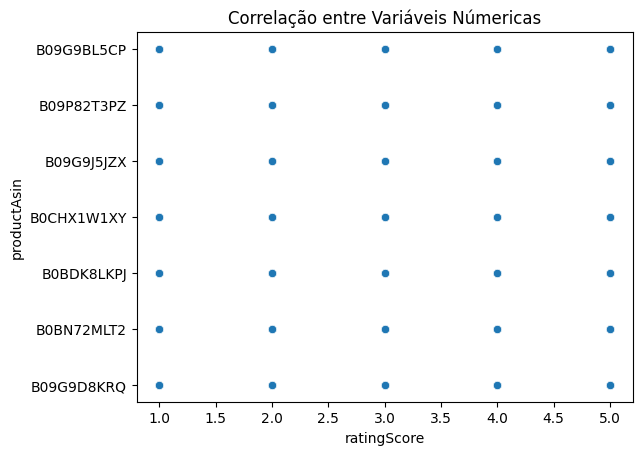

In [31]:
sns.scatterplot(x='ratingScore', y='productAsin', data=df)
plt.title('Correlação entre Variáveis Númericas')
plt.show()

#Conclusão dos Dados Observados

###1.Quais padrões você observou nas variáveis numéricas? (exemplo:distribuição normal, outliers)
R: Que em ambos os resultados, obtive uma grande variação entre elas. Nao houve variáveis proximas uma das outras

###2.Como estão distribuídas as variáveis categóricas? Alguma categoria se destaca em termos de frequência?
R: Estao distribuidas em satisfações do cliente com o aparelho. **Good, ExelLent e Nice** sao os que mais se destacam

###3.Você identificou correlações entre variáveis numéricas? Qual pode ser a relação entre essas variáveis?
R: A base de dados que eu escolhi é baseada em avaliações então nao encontrei correlações. O grafico de dispersão mostrou isso acima

###4.Com base nos dados, quais são as principais conclusões que você pode tirar? O que essas conclusões indicam para o contexto do dataset escolhido?
R: Que as avaliações dos aparelhos Iphone são positivas